In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df= pd.read_csv(r"C:\Users\himan\Desktop\project\netflix1.csv")

In [5]:
df.shape

(8790, 10)

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(8790, 10)

In [ ]:
#CONTENT DISTRIBUTION ON NETFLIX

In [11]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total content on Netflix')

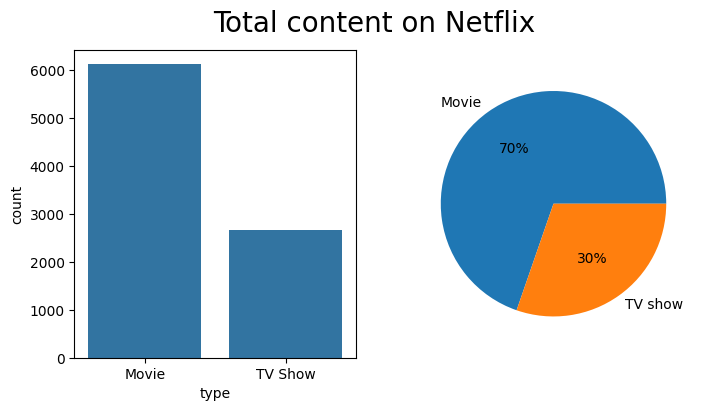

In [30]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sb.countplot(df, x=df['type'],ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV show'], autopct='%.0f%%')
plt.suptitle('Total content on Netflix', fontsize=20)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
## Visual representation of rating frequencyof Movies and TV show

In [32]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

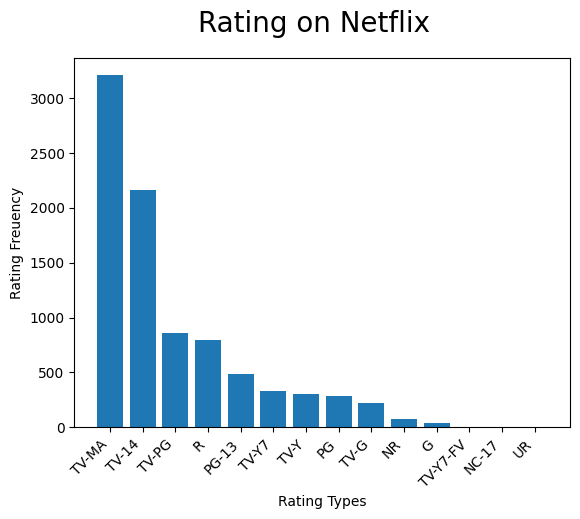

In [34]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Freuency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netfkix')

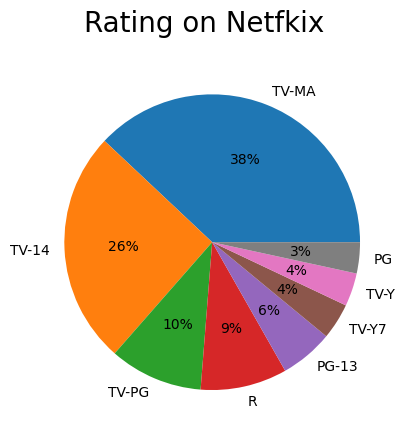

In [43]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netfkix', fontsize=20)

In [ ]:
## converting date_added to datetome

In [44]:
df['date_added']=pd.to_datetime(df['date_added'])

In [45]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [46]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64

In [ ]:
## Top 10 Countries with most content on netflix

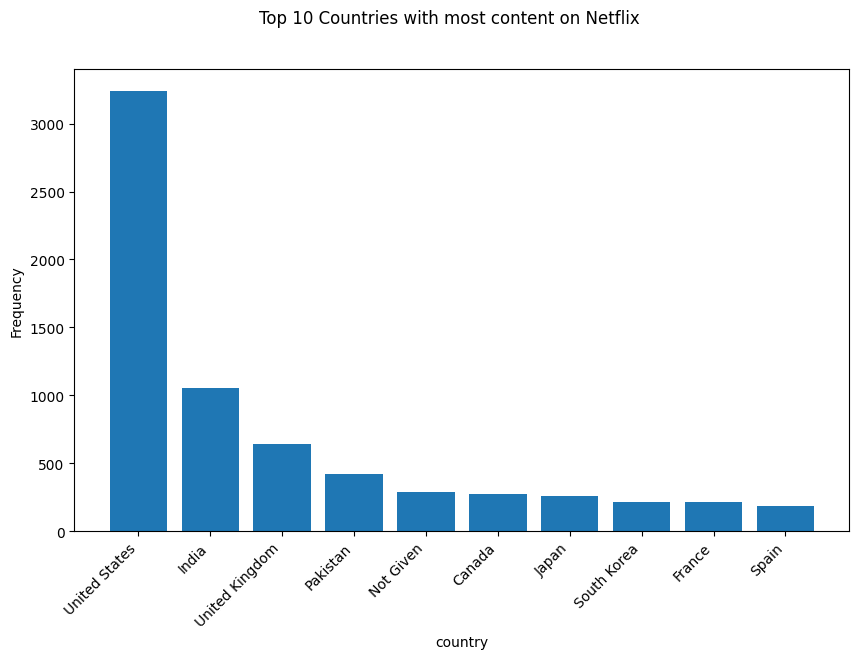

In [51]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 Countries with most content on Netflix")
plt.show()

In [52]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

In [ ]:
## Monthly releases of movies and TV shows on Netflix

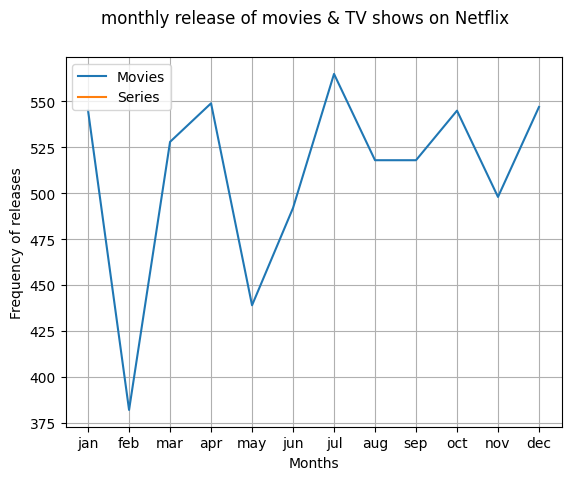

In [69]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV shows']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.legend()
plt.grid(True)
plt.suptitle("monthly release of movies & TV shows on Netflix")
plt.show()

In [ ]:
## yearly release pf movies and TV shows oon Netflix

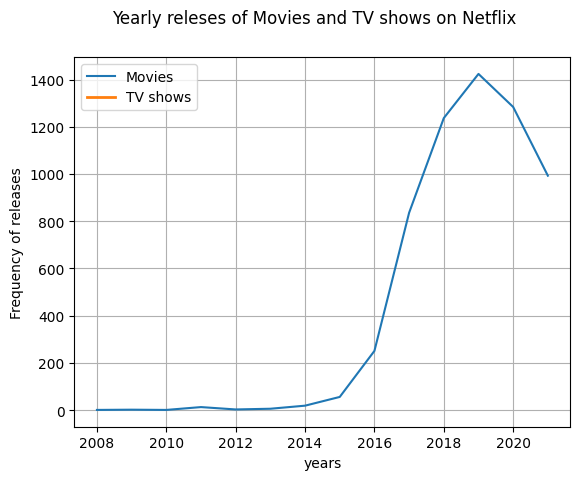

In [100]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV shows']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV shows')
plt.xlabel("years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releses of Movies and TV shows on Netflix")
plt.legend()
plt.show()

In [ ]:
## Top 10 popular movies generies

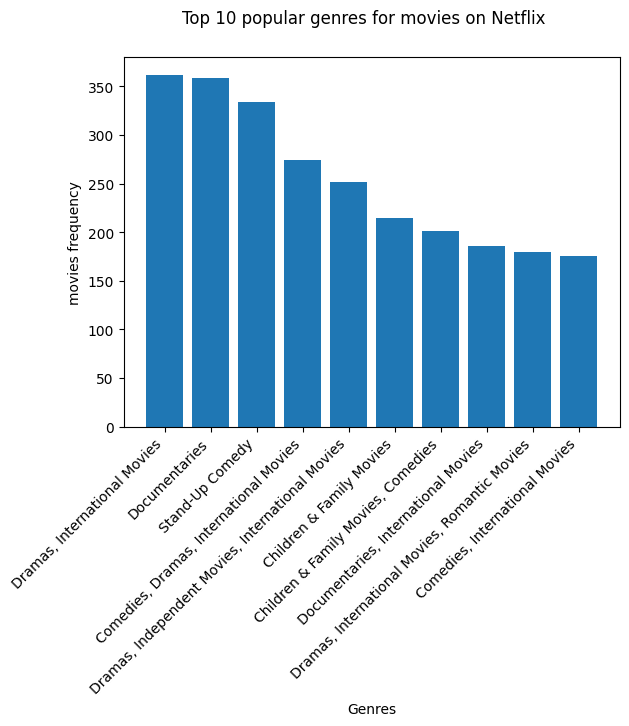

In [91]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_movies_genre=df[df['type']=='TV shows'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("movies frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()                                                                               

In [ ]:
## Top 10 popular TV shows genere

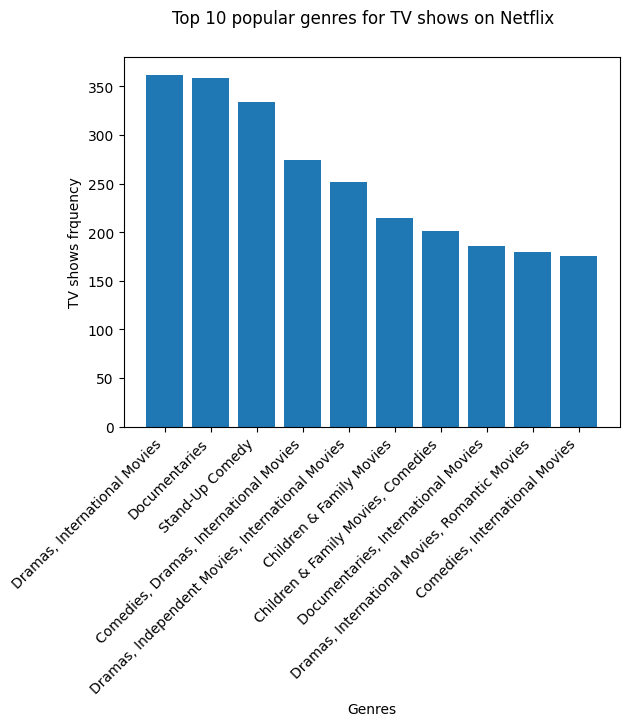

In [96]:
popular_movies_genre=df[df['type']=='TV shows'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV shows frquency")
plt.suptitle("Top 10 popular genres for TV shows on Netflix")
plt.show()

In [ ]:
## Top 15 directors across Netflix with high  frequency of movies and shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

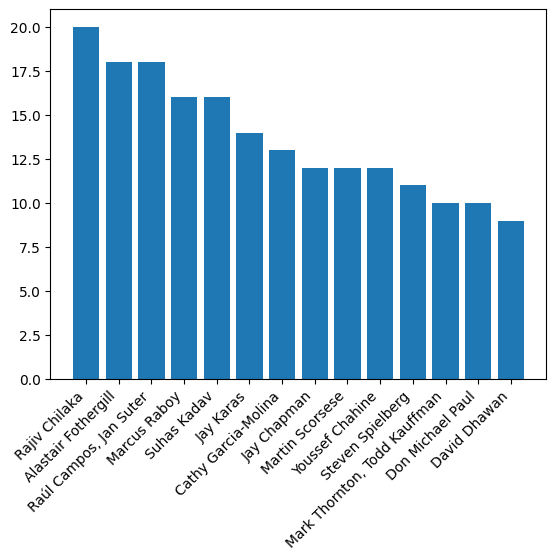

In [101]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')